In [341]:
%reload_ext autoreload
%autoreload 2

from saveload import *
from c_mnist import *
from models import *
from functions import *
from eval import *
from torchvision.datasets import MNIST, FashionMNIST
import pandas as pd

In [672]:
# VIEW LOGS
#torch.load(ROOT+'evaluation/logs_fashion_selective8lo_seed0.txt')
#torch.load(ROOT+'evaluation/main models/eval_contrastinf_fashion_seed0.txt')
torch.load(ROOT+'evaluation/main models/logs_fashion_seed0.txt')

[['Standard_VAE_fashion_60000_0_1_var0.01_seed0',
  'Epoch [1/1000], Training ELBO: 445.982, Reconstruction: 469.526, Regularization: -23.543 || Validation ELBO: 722.801',
  'Epoch [2/1000], Training ELBO: 750.691, Reconstruction: 776.104, Regularization: -25.413 || Validation ELBO: 769.085',
  'Epoch [3/1000], Training ELBO: 789.293, Reconstruction: 813.431, Regularization: -24.138 || Validation ELBO: 799.224',
  'Epoch [4/1000], Training ELBO: 812.347, Reconstruction: 836.219, Regularization: -23.872 || Validation ELBO: 816.407',
  'Epoch [5/1000], Training ELBO: 827.836, Reconstruction: 851.655, Regularization: -23.819 || Validation ELBO: 830.583',
  'Epoch [6/1000], Training ELBO: 839.490, Reconstruction: 863.359, Regularization: -23.869 || Validation ELBO: 836.467',
  'Epoch [7/1000], Training ELBO: 847.495, Reconstruction: 871.411, Regularization: -23.916 || Validation ELBO: 845.630',
  'Epoch [8/1000], Training ELBO: 853.710, Reconstruction: 877.563, Regularization: -23.853 || V

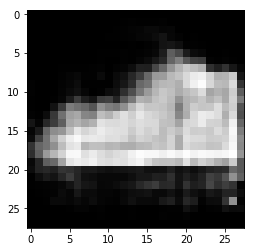

In [553]:
m = models_contr_inf_fashion[0]
inp = torch.randn(10)
plt.imshow(m.decoder(inp).view(28,28).detach(), cmap='gray')

# Load eval dfs, models and testsets

In [268]:
random_seed=0

In [628]:
# TO DO : contr inf models -> main models folder
models_standard_mnist = load_folder(VAE, 'standard/mnist', random_seed)
models_standard_fashion = load_folder(VAE, 'standard/fashion', random_seed)
models_normal_mnist = load_folder(SMVAE_NORMAL, 'normal/mnist', random_seed)
models_normal_fashion = load_folder(SMVAE_NORMAL, 'normal/fashion', random_seed)
models_contr_inf_mnist = load_folder(VAE_CONTRAST_INFERENCE, 'contrast_inference/mnist', random_seed)
models_contr_inf_fashion = load_folder(VAE_CONTRAST_INFERENCE, 'contrast_inference/fashion', random_seed)

models_standard_sel8hi = load_folder(VAE, 'standard/selective8hi', random_seed)
models_normal_sel8hi = load_folder(SMVAE_NORMAL, 'normal/selective8hi', random_seed)
models_contr_inf_sel8hi = load_folder(VAE_CONTRAST_INFERENCE, 'contrast_inference/selective8hi', random_seed)
models_standard_sel8lo = load_folder(VAE, 'standard/selective8lo', random_seed)
models_normal_sel8lo = load_folder(SMVAE_NORMAL, 'normal/selective8lo', random_seed)
models_contr_inf_sel8lo = load_folder(VAE_CONTRAST_INFERENCE, 'contrast_inference/selective8lo', random_seed)

models_mnist = models_standard_mnist + models_normal_mnist + models_contr_inf_mnist
models_fashion = models_standard_fashion + models_normal_fashion + models_contr_inf_fashion
models_sel8hi = models_standard_sel8hi + models_normal_sel8hi + models_contr_inf_sel8hi
models_sel8lo = models_standard_sel8lo + models_normal_sel8lo + models_contr_inf_sel8lo

In [629]:
set_seed(random_seed)

testset_mnist = create_testset(MNIST, return_validation=False)
testset_fashion = create_testset(FashionMNIST, return_validation=False)

testset_mnist_selective = label_selective(testset_mnist, 8)
testset_fashion_selective = label_selective(testset_fashion, 8)

In [671]:
myts = create_trainset(FashionMNIST, 60000, 1, 1)
min(torch.max(myts[i][0]) for i in range(len(myts)))

tensor(0.9961)

In [312]:
ROOT = '//mnt/smvae/'

mnist0 = torch.load(ROOT+'evaluation/main models/eval_mnist_seed0.txt')
mnist1 = torch.load(ROOT+'evaluation/main models/eval_mnist_seed1.txt')
fashion0 = torch.load(ROOT+'evaluation/main models/eval_fashion_seed0.txt')
fashion1 = torch.load(ROOT+'evaluation/main models/eval_fashion_seed1.txt')
contr_inf_m0 = torch.load(ROOT+'evaluation/main models/eval_contrastinf_mnist_seed0.txt')
contr_inf_f0 = torch.load(ROOT+'evaluation/main models/eval_contrastinf_fashion_seed0.txt')

results = {**mnist0, **mnist1, **fashion0, **fashion1, **contr_inf_m0, **contr_inf_f0}

df, df_full, df_hi, df_lo = create_df_from_dict(results)
df[(df['contrast']=='[0, 1]')&(df['size']==60000)&(df['data']=='mnist')]

,ELBO,REC,neg_KL,type,data,size,contrast,var,seed
ContrastInference_VAE_mnist_60000_0_1_var0.01_seed0,866.11,891.02,-24.91,ContrastInference_VAE,mnist,60000,"[0, 1]",0.01,0
Normal_SMVAE_mnist_60000_0_1_var0.01_seed0,860.75,887.84,-27.09,Normal_SMVAE,mnist,60000,"[0, 1]",0.01,0
Normal_SMVAE_mnist_60000_0_1_var0.01_seed1,850.59,876.80,-26.21,Normal_SMVAE,mnist,60000,"[0, 1]",0.01,1
Standard_VAE_mnist_60000_0_1_var0.01_seed0,861.10,887.63,-26.53,Standard_VAE,mnist,60000,"[0, 1]",0.01,0
Standard_VAE_mnist_60000_0_1_var0.01_seed1,861.15,887.66,-26.51,Standard_VAE,mnist,60000,"[0, 1]",0.01,1


In [645]:
selective8hi_full = torch.load(ROOT+'evaluation/selective/eval_fashion_full_selective8hi_seed0.txt')
selective8hi_only = torch.load(ROOT+'evaluation/selective/eval_fashion_only_selective8hi_seed0.txt')
selective8lo_full = torch.load(ROOT+'evaluation/selective/eval_fashion_full_selective8lo_seed0.txt')
selective8lo_only = torch.load(ROOT+'evaluation/selective/eval_fashion_only_selective8lo_seed0.txt')

selective8lo_mnist_full = torch.load(ROOT+'evaluation/selective/eval_mnist_full_selective8lo_seed0.txt')
selective8lo_mnist_only = torch.load(ROOT+'evaluation/selective/eval_mnist_only_selective8lo_seed0.txt')

selective_res = {**selective8hi_full, **selective8hi_only, **selective8lo_full, **selective8lo_only,
                 **selective8lo_mnist_full, **selective8lo_mnist_only}

df_sel8hi_full, x, y, z = create_df_from_dict(selective8hi_full)
df_sel8hi_only, x, y, z = create_df_from_dict(selective8hi_only)
df_sel8lo_full, x, y, z = create_df_from_dict({**selective8lo_full, **selective8lo_mnist_full})
df_sel8lo_only, x, y, z = create_df_from_dict({**selective8lo_only, **selective8lo_mnist_only})

df_sel8lo_only

,ELBO,REC,neg_KL,type,data,size,contrast,var,seed
ContrastInference_VAE_fashion_20000_0_1_var0.01_seed0,705.74,730.04,-24.31,ContrastInference_VAE,fashion,20000,"[0, 1]",0.01,0
ContrastInference_VAE_fashion_2000_0_1_var0.01_seed0,574.90,602.59,-27.69,ContrastInference_VAE,fashion,2000,"[0, 1]",0.01,0
ContrastInference_VAE_fashion_60000_0_1_var0.01_seed0,716.37,739.87,-23.50,ContrastInference_VAE,fashion,60000,"[0, 1]",0.01,0
ContrastInference_VAE_fashion_6000_0_1_var0.01_seed0,668.62,692.43,-23.81,ContrastInference_VAE,fashion,6000,"[0, 1]",0.01,0
ContrastInference_VAE_fashion_600_0_1_var0.01_seed0,444.23,483.40,-39.17,ContrastInference_VAE,fashion,600,"[0, 1]",0.01,0
ContrastInference_VAE_mnist_20000_0_1_var0.01_seed0,541.63,566.72,-25.09,ContrastInference_VAE,mnist,20000,"[0, 1]",0.01,0
ContrastInference_VAE_mnist_2000_0_1_var0.01_seed0,416.28,445.40,-29.12,ContrastInference_VAE,mnist,2000,"[0, 1]",0.01,0
ContrastInference_VAE_mnist_60000_0_1_var0.01_seed0,624.89,649.25,-24.36,ContrastInference_VAE,mnist,60000,"[0, 1]",0.01,0
ContrastInference_VAE_mnist_6000_0_1_var0.01_seed0,502.92,529.41,-26.49,ContrastInference_VAE,mnist,6000,"[0, 1]",0.01,0
ContrastInference_VAE_mnist_600_0_1_var0.01_seed0,134.62,166.63,-32.01,ContrastInference_VAE,mnist,600,"[0, 1]",0.01,0


# Contrast & posterior_mean plots

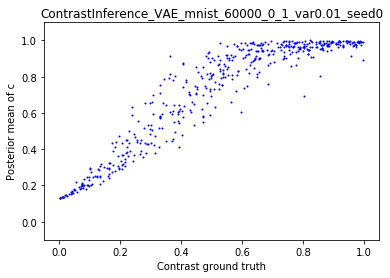

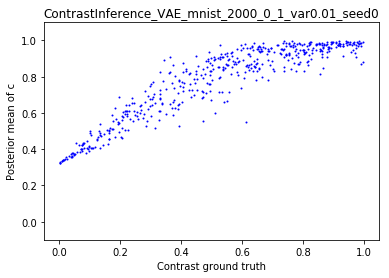

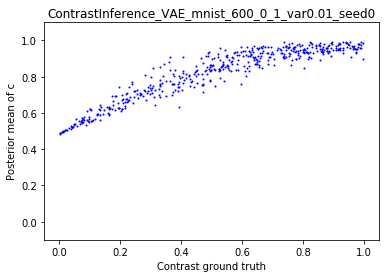

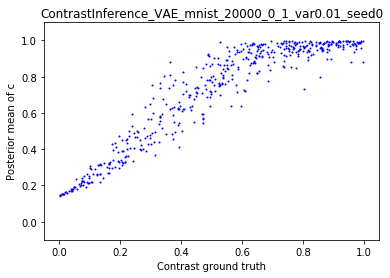

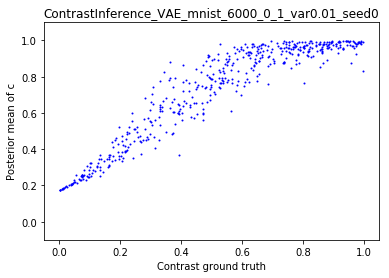

In [633]:
# contrast inf 

for model in models_contr_inf_sel8lo:
    if 'mnist' in model.name:
        model_cs, contrasts = [], []
        for im in testset_mnist_selective:
            model_c = float(model.contrast_inference(im[0]).detach())
            model_cs.append(model_c)
            contrasts.append(im[1][1])
        model_cs = torch.Tensor(model_cs)
        contrasts = torch.Tensor(contrasts)
        plot_contrast(contrasts, model_cs, model.name, regression=False)

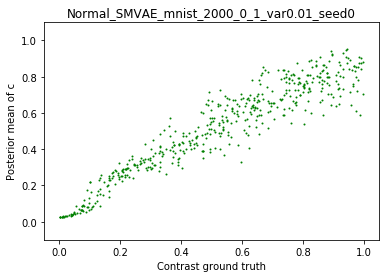

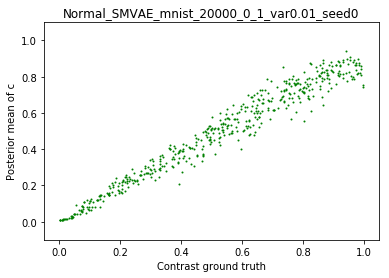

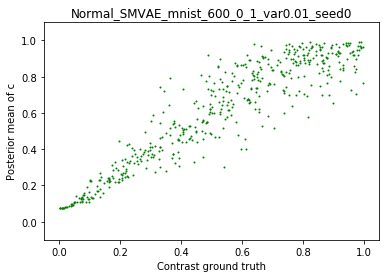

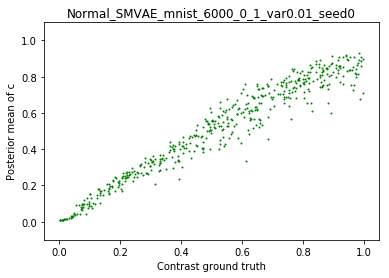

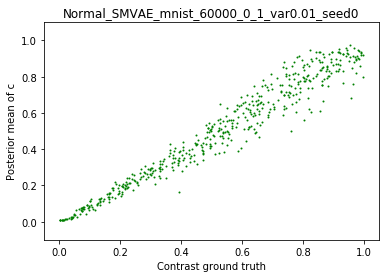

In [635]:
for model in models_normal_sel8lo:
    if 'mnist' in model.name:
        means, variances, contrasts = get_averages(model, testset_mnist_selective)
        c_means = torch.sigmoid(means[:,-1])
        c_variances = variances[:,-1]
        plot_contrast(contrasts, c_means, model.name, regression=False, c='green')

for model in models_normal_sel8lo:
    break
    means, variances, contrasts = get_averages(model, testset_fashion)
    c_means = torch.sigmoid(means[:,-1])
    c_variances = variances[:,-1]
    plot_contrast(contrasts, c_means, model.name, regression=False, c='green')
    
for model in models_standard_fashion:
    break
    if '60000' in model.name:
        means, variances, contrasts = get_averages(model, testset_fashion)
        sum_of_squares = torch.sum(means**2, 1)
        plot_contrast(contrasts, sum_of_squares, model.name, limit=False)

# ELBOs plot

In [644]:
df_sel8lo_only

,ELBO,REC,neg_KL,type,data,size,contrast,var,seed
ContrastInference_VAE_fashion_20000_0_1_var0.01_seed0,705.74,730.04,-24.31,ContrastInference_VAE,fashion,20000,"[0, 1]",0.01,0
ContrastInference_VAE_fashion_2000_0_1_var0.01_seed0,574.90,602.59,-27.69,ContrastInference_VAE,fashion,2000,"[0, 1]",0.01,0
ContrastInference_VAE_fashion_60000_0_1_var0.01_seed0,716.37,739.87,-23.50,ContrastInference_VAE,fashion,60000,"[0, 1]",0.01,0
ContrastInference_VAE_fashion_6000_0_1_var0.01_seed0,668.62,692.43,-23.81,ContrastInference_VAE,fashion,6000,"[0, 1]",0.01,0
ContrastInference_VAE_fashion_600_0_1_var0.01_seed0,444.23,483.40,-39.17,ContrastInference_VAE,fashion,600,"[0, 1]",0.01,0
Normal_SMVAE_fashion_20000_0_1_var0.01_seed0,673.97,707.48,-33.51,Normal_SMVAE,fashion,20000,"[0, 1]",0.01,0
Normal_SMVAE_fashion_2000_0_1_var0.01_seed0,580.12,621.37,-41.26,Normal_SMVAE,fashion,2000,"[0, 1]",0.01,0
Normal_SMVAE_fashion_60000_0_1_var0.01_seed0,691.90,721.81,-29.91,Normal_SMVAE,fashion,60000,"[0, 1]",0.01,0
Normal_SMVAE_fashion_6000_0_1_var0.01_seed0,640.58,675.69,-35.12,Normal_SMVAE,fashion,6000,"[0, 1]",0.01,0
Normal_SMVAE_fashion_600_0_1_var0.01_seed0,349.84,393.51,-43.67,Normal_SMVAE,fashion,600,"[0, 1]",0.01,0


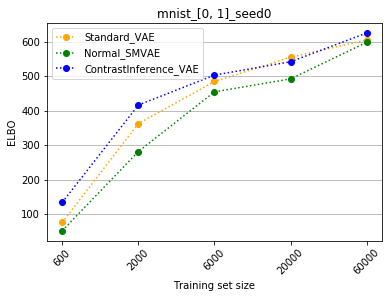

In [653]:
mydf, myseed, mydata = df_sel8lo_only, 0, 'mnist'

df_standard = df_subset(mydf, myseed, 'Standard_VAE', mydata)
df_normal = df_subset(mydf, myseed, 'Normal_SMVAE', mydata)
df_contr_inf = df_subset(mydf, myseed, 'ContrastInference_VAE', mydata)
plot_elbos((df_standard, 'orange'), (df_normal, 'green'), (df_contr_inf, 'blue'))

# Latent $\mathbf{z}$ & contrast correlation

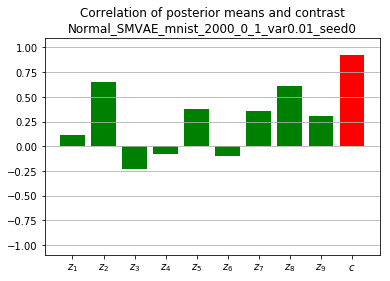

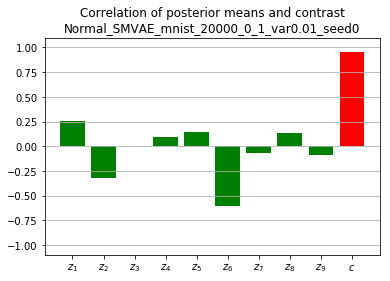

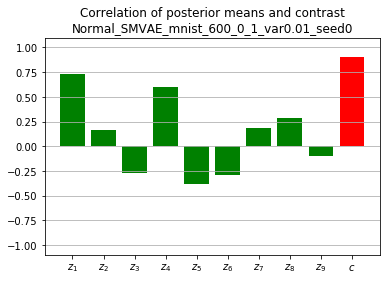

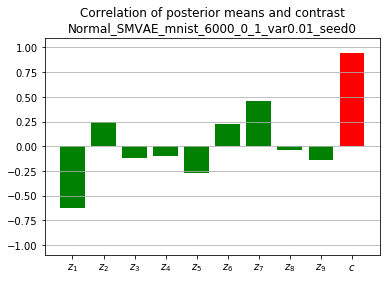

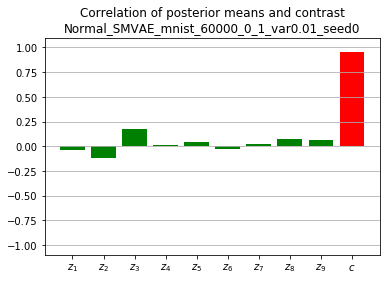

In [651]:
for model in models_normal_sel8lo:
    if 'mnist' in model.name:
        mytestset = testset_mnist_selective
        means, variances, contrasts = get_averages(model, mytestset)
        corr_barplot(means, variances, contrasts, model, mytestset, 'green')

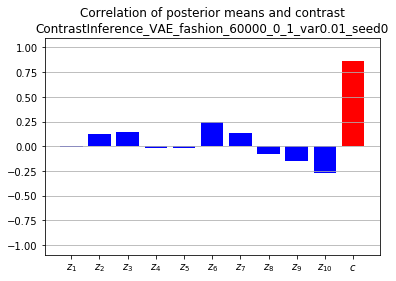

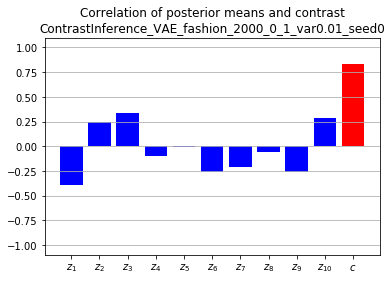

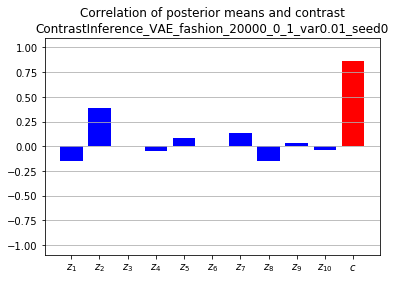

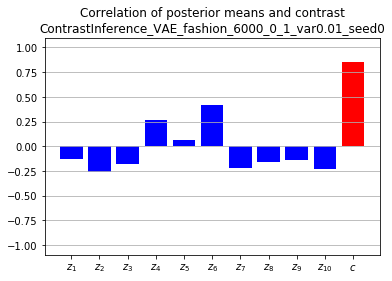

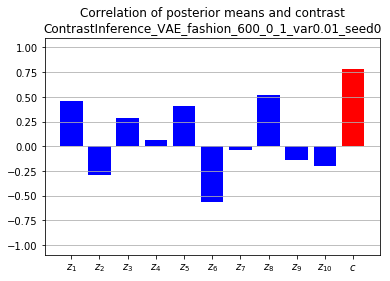

In [626]:
for model in models_contr_inf_sel8lo:
    if '' in model.name:
        mytestset = testset_fashion
        means, variances, contrasts = get_contr_averages(model, mytestset)
        corr_barplot(means, variances, contrasts, model, mytestset, 'blue')

# Visual comparison

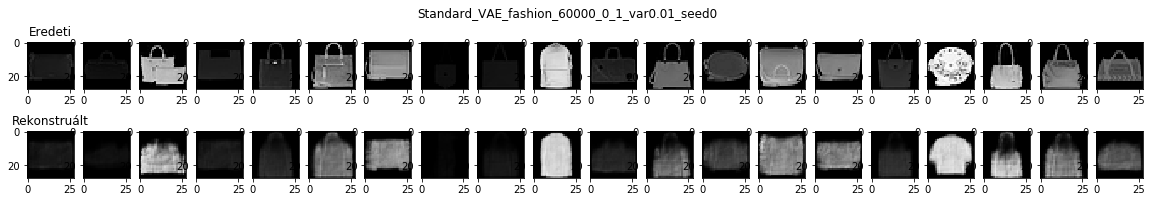

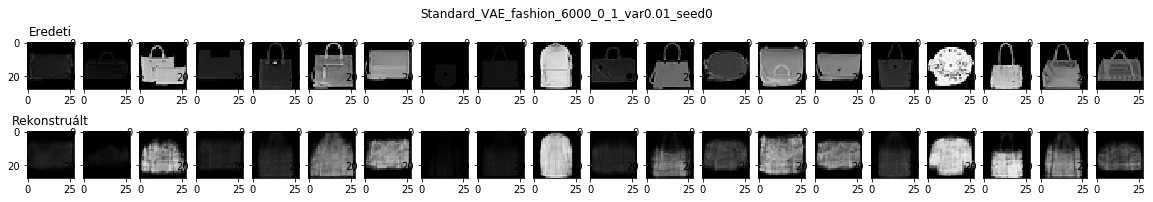

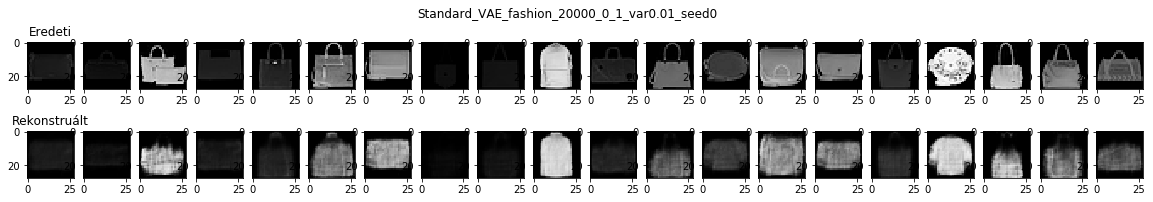

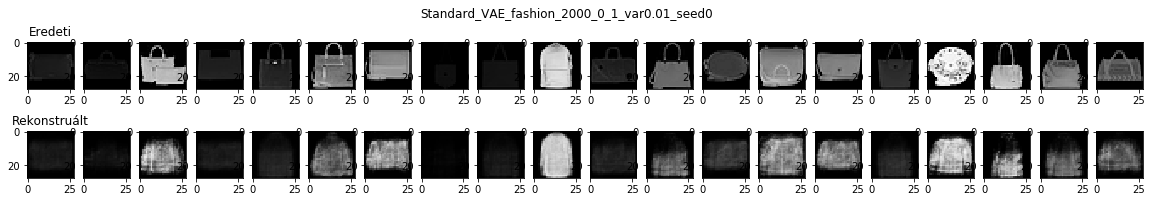

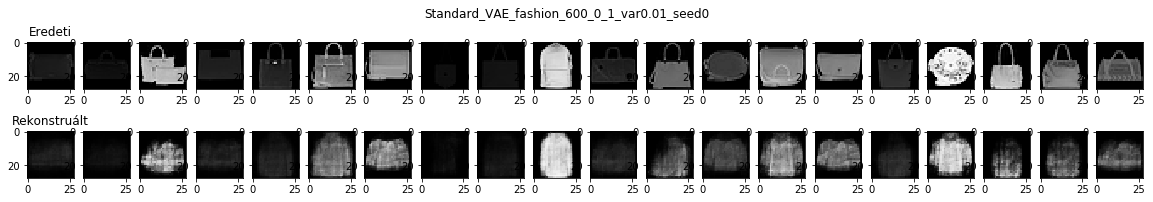

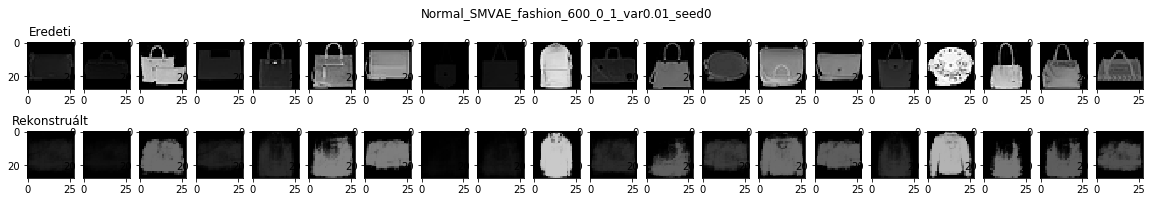

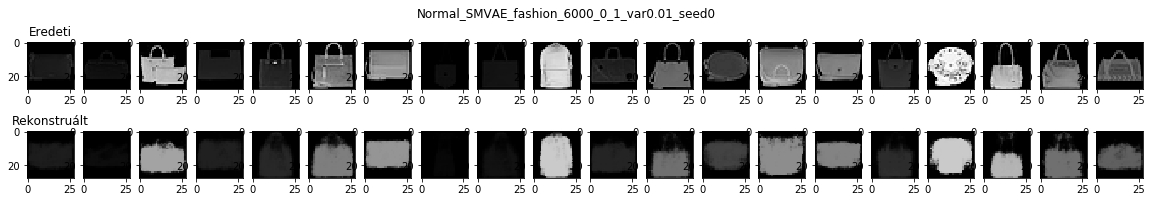

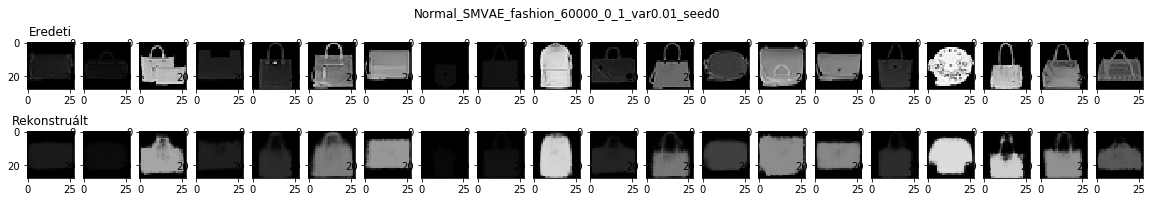

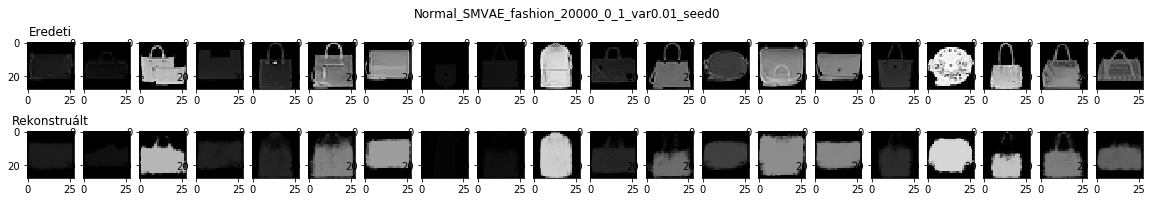

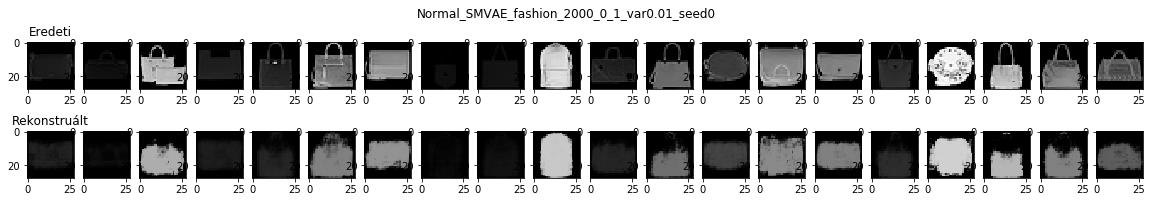

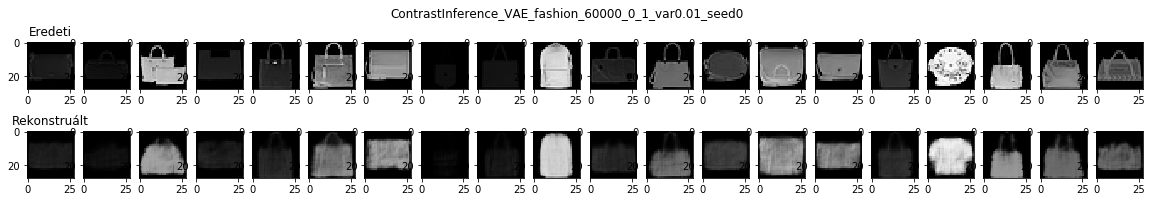

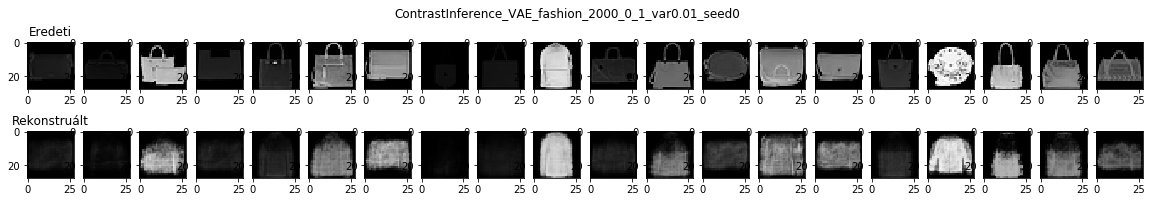

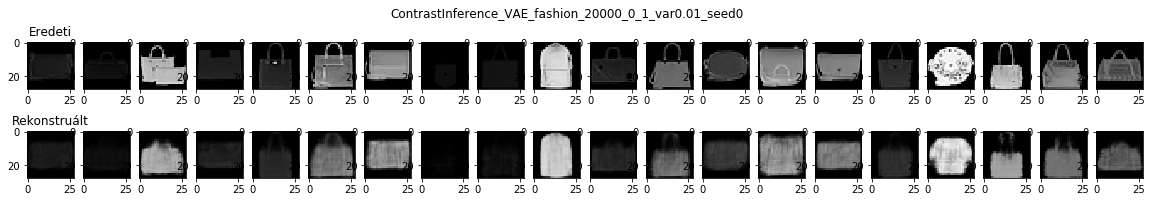

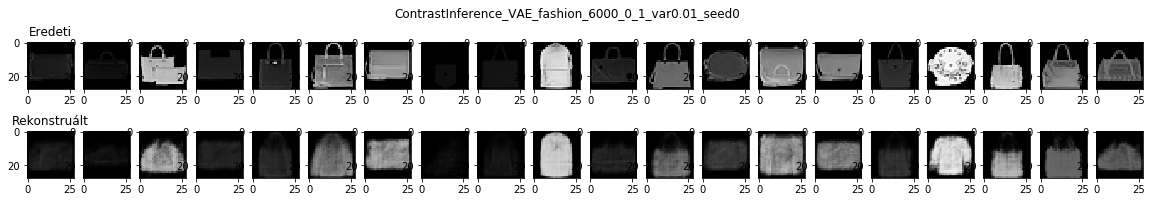

In [ ]:
model_s = load_model(VAE, ROOT+'standard/mnist/Standard_VAE_mnist_60000_0_1_var0.01_seed0.pth')
model_n = load_model(SMVAE_NORMAL, ROOT+'normal/mnist/Normal_SMVAE_mnist_60000_0_1_var0.01_seed0.pth')
model_c = load_model(VAE_CONTRAST_INFERENCE, ROOT+'contrast_inference/mnist/ContrastInference_VAE_mnist_60000_0_1_var0.01_seed0.pth')
mymodels = [model_s, model_n, model_c]
set_seed(random_seed)

for model in models_sel8lo:
    compare(model, testset_fashion_selective, 20, title=model.name)